4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
dict_keys(['loss', 'accuracy'])


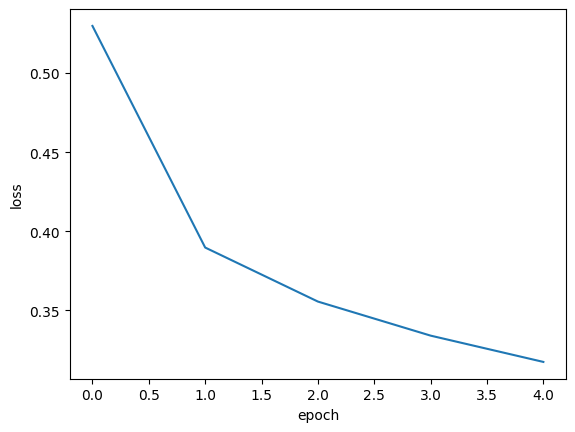

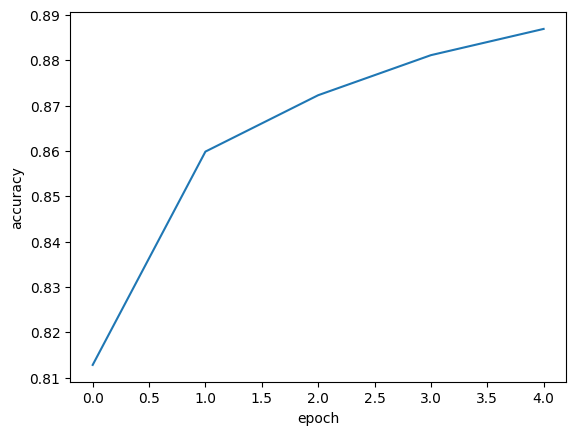

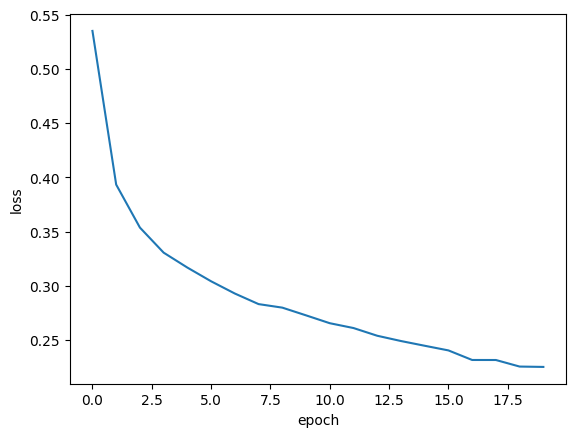

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


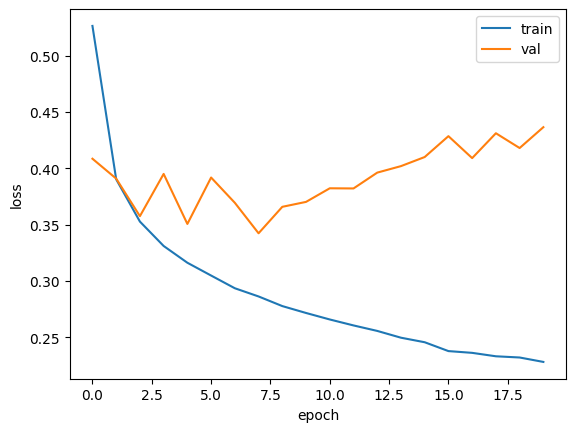

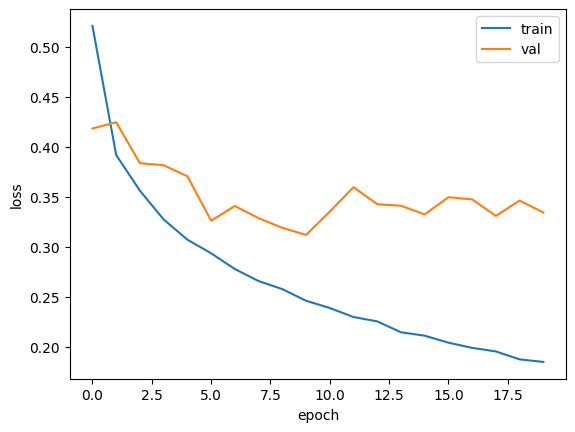

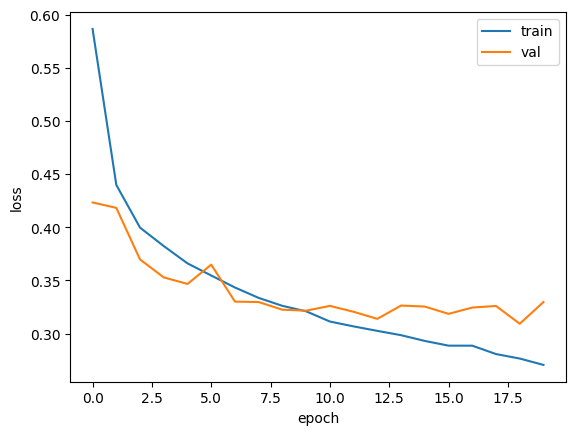

KeyboardInterrupt: 

In [1]:
# 손실 곡선 : fit()로 훈련하면 에포크 횟수, 손실, 정확도 등이 History 객체 안에 저장되어서 이 객체를 반환한다. 이 객체로 그래프를 그릴 수 있다.
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

# 모델을 만드는 간단한 함수 제작해보기
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

model = model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) # history 딕셔너리 안에 history 객체 넣기, verbose=0은 훈련 과정을 나타내지 않는다.
print(history.history.keys()) # 딕셔너리 안에 'loss', 'accuracy' key가 있다.

import matplotlib.pyplot as plt
plt.plot(history.history['loss']) # 손실 함수 그리기
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy']) # 정확도 그리기
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0) # 에포크 횟수 20으로 늘리고 그래프 확인해보기
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 검증 손실 : 훈련 세트 뿐만 아니라 검증 세트에도 점수가 필요하다. 둘 사이의 손실을 그려보고 과대/과소적합을 확인해야한다.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target)) # validation_data 매개변수에 검증에 사용할 입력,타깃값을 입력한다.
print(history.history.keys())
plt.plot(history.history['loss']) # 훈련 손실값
plt.plot(history.history['val_loss']) # 검증 손실값
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show() # 5번째 에포크에 손실이 다시 상승한다.

# adam은 적응적 학습률을 사용해 에포크가 진행되면서 학습률의 크기를 줄일 수 있다.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy') # adam 사용
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 드롭아웃 : 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는다.
# 1. 특정 뉴런에 과대 적합되는것을 막을 수 있음.
# 2. 드롭아웃이 적용된 2개의 신경망 그림을 보면 2개의 신경망을 앙상블하는 것과 유사하진 않지만 효과가 있음.
model = model_fn(keras.layers.Dropout(0.3)) # 30% 버리기
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show() # 과대적합이 확실히 줄었다.

# 모델 저장과 복원
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))
model.save_weights('model-weights.h5') # save_weights() : 모델 가중치 저장(텐서플로의 체크포인트 포맷으로 저장하지만 .h5라고 파일확장자를 쓰면 HDF5 포맷으로 저장한다.)
model.save('model-whole.h5') # save() : 모델 구조와 모델 파라미터를 함께 저장한다.
!ls -al *.h5 # 파일 확인

# 1. 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용하기
# 2. model-whole.h5파일에서 새로운 모델을 만들어서 바로 사용하기
# 2 가지를 한번 비교해보자.
# 1번
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5') # load_weights() : 모델 가중치 로드

# predict()는 각 샘플에 대해 10개 클래스의 확률을 출력하므로 12000*10=120000개를 출력한다.
# 너무 많으니 10개 확률 중에 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도를 계산해보자.
import numpy as np
val_labels = np.argmax(model.predict(val_sclaed),axis=-1) # argmax()로 가장 큰 값의 인덱스 반환, axis=-1은 배열의 마지막 차원을 따라 최댓값을 고른다.
print(np.mean(val_lables==val_target)) # 0.87

# 2번
model = keras.models.load_model('model-while.h5')
model.evaluate(val_scaled, val_target) # 0.87

# 콜백 : 훈련 중간에 어떤 작업을 수행할 수 있게하는 객체다. keras.callbacks 패키지 아래의 클래스들이다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True) # ModelCheckpoint()로 에포크마다 모델을 저장하고 save_best_only=True는 가장 낮은 검증 손실(최상의 검증 점수)을 만드는 모델을 저장한다.
# 저장될 파일 이름을 best-model.h5로 저장한다.
model.fit(train_scaled, train_target, epochs=20, verbose=0,validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb]) # callbacks에 체크포인트 배열을 넣는다.

model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

# 과대 적합이 시작되기 전에 훈련을 미리 중지하는 것을 조기 종료라고 한다. 에포크 수를 제한하는 역할을 해준다.
# EarlyStopping 콜백 제공함. patience=2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지한다.
# restore_best_weights=True로 놓으면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True) # patience, restore_best_weights
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb, early_stopping_cb]) # callbacks에 early_stopping_cb도 추가한다.
print(early_stopping_cb.stopped_epoch) # 12 stopped_epoch로 정지했을 때의 에포크를 볼 수 있다.

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
model.evaluate(val_scaled, val_target) # 조기종료한 모델의 검증 세트 성능 확인
